# Tutorial for 2-photon calcium imaging and holographic optical stimulation dataset.

This tutorial shows how to access the *Two Photon dataset* using `pynwb`. 

This dataset contains the 2-photon calcium imaging holographic stimulation data and visual stimuli events.

Contents:

- [Reading an NWB file](#read-nwb)
- [Access subject and task metadata](#access-subject)
- [Access Imaging](#access-imaging)
- [Access Odor stimuli](#access-odor)
- [Access Treadmill traces](#access-treadmill)

A schematic representation where the source data is saved in NWB:

![Alt text](./conversion_outline_diagram.png)

# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [179]:
import numpy as np
from pynwb import NWBHDF5IO
from pathlib import Path
# Choose which epoch to explore
subject_id = "134"
session_id = "22"
# The file path to a .nwb file
rooth_path = Path("F:/CN_data/Reimer-Arenkiel-conversion_nwb")
nwbfile_path = rooth_path / f"sub-{subject_id}_ses-{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

,pixel_mask
id,
0,"[[150, 83, 1.0], [151, 83, 1.0], [152, 83, 1.0], [153, 83, 1.0], [154, 83, 1.0], [155, 83, 1.0], [156, 83, 1.0], [157, 83, 1.0], [158, 83, 1.0], [159, 83, 1.0], [160, 83, 1.0], [161, 83, 1.0], [149, 84, 1.0], [150, 84, 1.0], [151, 84, 1.0], [152, 84, 1.0], [153, 84, 1.0], [154, 84, 1.0], [155, 84, 1.0], [156, 84, 1.0], [157, 84, 1.0], [158, 84, 1.0], [159, 84, 1.0], [160, 84, 1.0], [161, 84, 1.0], [162, 84, 1.0], [163, 84, 1.0], [147, 85, 1.0], [148, 85, 1.0], [149, 85, 1.0], [150, 85, 1.0], [151, 85, 1.0], [152, 85, 1.0], [153, 85, 1.0], [154, 85, 1.0], [155, 85, 1.0], [156, 85, 1.0], [157, 85, 1.0], [158, 85, 1.0], [159, 85, 1.0], [160, 85, 1.0], [161, 85, 1.0], [162, 85, 1.0], [163, 85, 1.0], [164, 85, 1.0], [147, 86, 1.0], [148, 86, 1.0], [149, 86, 1.0], [150, 86, 1.0], [151, 86, 1.0], [152, 86, 1.0], [153, 86, 1.0], [154, 86, 1.0], [155, 86, 1.0], [156, 86, 1.0], [157, 86, 1.0], [158, 86, 1.0], [159, 86, 1.0], [160, 86, 1.0], [161, 86, 1.0], [162, 86, 1.0], [163, 86, 1.0], [164, 86, 1.0], [146, 87, 1.0], [147, 87, 1.0], [148, 87, 1.0], [149, 87, 1.0], [150, 87, 1.0], [151, 87, 1.0], [152, 87, 1.0], [153, 87, 1.0], [154, 87, 1.0], [155, 87, 1.0], [156, 87, 1.0], [157, 87, 1.0], [158, 87, 1.0], [159, 87, 1.0], [160, 87, 1.0], [161, 87, 1.0], [162, 87, 1.0], [163, 87, 1.0], [164, 87, 1.0], [147, 88, 1.0], [148, 88, 1.0], [149, 88, 1.0], [150, 88, 1.0], [151, 88, 1.0], [152, 88, 1.0], [153, 88, 1.0], [154, 88, 1.0], [155, 88, 1.0], [156, 88, 1.0], [157, 88, 1.0], [158, 88, 1.0], [159, 88, 1.0], [160, 88, 1.0], [161, 88, 1.0], [162, 88, 1.0], [163, 88, 1.0], [148, 89, 1.0], ...]"
1,"[[152, 91, 1.0], [153, 91, 1.0], [154, 91, 1.0], [155, 91, 1.0], [156, 91, 1.0], [150, 92, 1.0], [151, 92, 1.0], [152, 92, 1.0], [153, 92, 1.0], [154, 92, 1.0], [155, 92, 1.0], [156, 92, 1.0], [157, 92, 1.0], [149, 93, 1.0], [150, 93, 1.0], [151, 93, 1.0], [152, 93, 1.0], [153, 93, 1.0], [154, 93, 1.0], [155, 93, 1.0], [156, 93, 1.0], [157, 93, 1.0], [158, 93, 1.0], [148, 94, 1.0], [149, 94, 1.0], [150, 94, 1.0], [151, 94, 1.0], [152, 94, 1.0], [153, 94, 1.0], [154, 94, 1.0], [155, 94, 1.0], [156, 94, 1.0], [157, 94, 1.0], [158, 94, 1.0], [159, 94, 1.0], [148, 95, 1.0], [149, 95, 1.0], [150, 95, 1.0], [151, 95, 1.0], [152, 95, 1.0], [153, 95, 1.0], [154, 95, 1.0], [155, 95, 1.0], [156, 95, 1.0], [157, 95, 1.0], [158, 95, 1.0], [159, 95, 1.0], [160, 95, 1.0], [148, 96, 1.0], [149, 96, 1.0], [150, 96, 1.0], [151, 96, 1.0], [152, 96, 1.0], [153, 96, 1.0], [154, 96, 1.0], [155, 96, 1.0], [156, 96, 1.0], [157, 96, 1.0], [158, 96, 1.0], [159, 96, 1.0], [160, 96, 1.0], [147, 97, 1.0], [148, 97, 1.0], [149, 97, 1.0], [150, 97, 1.0], [151, 97, 1.0], [152, 97, 1.0], [153, 97, 1.0], [154, 97, 1.0], [155, 97, 1.0], [156, 97, 1.0], [157, 97, 1.0], [158, 97, 1.0], [159, 97, 1.0], [160, 97, 1.0], [161, 97, 1.0], [147, 98, 1.0], [148, 98, 1.0], [149, 98, 1.0], [150, 98, 1.0], [151, 98, 1.0], [152, 98, 1.0], [153, 98, 1.0], [154, 98, 1.0], [155, 98, 1.0], [156, 98, 1.0], [157, 98, 1.0], [158, 98, 1.0], [159, 98, 1.0], [160, 98, 1.0], [161, 98, 1.0], [148, 99, 1.0], [149, 99, 1.0], [150, 99, 1.0], [151, 99, 1.0], [152, 99, 1.0], [153, 99, 1.0], [154, 99, 1.0], [155, 99, 1.0], [156, 99, 1.0], ...]"
2,"[[145, 100, 1.0], [146, 100, 1.0], [147, 100, 1.0], [143, 101, 1.0], [144, 101, 1.0], [145, 101, 1.0], [146, 101, 1.0], [147, 101, 1.0], [148, 101, 1.0], [149, 101, 1.0], [142, 102, 1.0], [143, 102, 1.0], [144, 102, 1.0], [145, 102, 1.0], [146, 102, 1.0], [147, 102, 1.0], [148, 102, 1.0], [149, 102, 1.0], [150, 102, 1.0], [141, 103, 1.0], [142, 103, 1.0], [143, 103, 1.0], [144, 103, 1.0], [145, 103, 1.0], [146, 103, 1.0], [147, 103, 1.0], [148, 103, 1.0], [149, 103, 1.0], [150, 103, 1.0], [151, 103, 1.0], [140, 104, 1.0], [141, 104, 1.0], [142, 104, 1.0], [143, 104, 1.0], [144, 104, 1.0], [145, 104, 1.0], [146, 104, 1.0], [147, 104, 1.0], [148, 104, 1.0], [149, 104, 1.0], [150, 104, 1.0], [151, 104, 1.0], [152, 104, 1.0], [140, 105, 1.0], [141, 105, 1

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from all_sessions.Session datajoint table.

In [180]:
nwbfile.session_start_time

datetime.datetime(2022, 7, 21, 0, 0, tzinfo=tzoffset(None, -18000))

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [181]:
nwbfile.subject

subject pynwb.file.Subject at 0x2130502366320
Fields:
  age__reference: birth
  date_of_birth: 2021-07-15 00:00:00+02:00
  description: ArenkielMouse
  sex: M
  species: Mus musculus
  subject_id: 134

# Access TwoPhoton Imaging <a name="access-imaging"></a>

This section demonstraces how to access the raw Two Photon imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw TwoPhoton Imaging

The raw TwoPhoton imaging data is stored in `pynwb.ophys.TwoPhotonSeries` objects (for each channel and plane separately) which is added to `nwbfile.acquisition`.

The data in [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [182]:
photon_series_names = [photon_series_name for photon_series_name in nwbfile.acquisition.keys() if "two_photon_series" in photon_series_name]
print(photon_series_names)

['two_photon_series_FOV1_channel1', 'two_photon_series_FOV2_channel1', 'two_photon_series_FOV3_channel1']


C:\Users\algab\AppData\Local\Temp\ipykernel_24956\3031583403.py:8: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



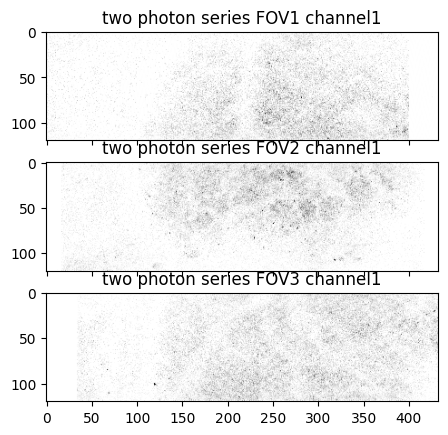

In [183]:
# Visualize the imaging data.
from matplotlib import pyplot as plt
fig, axs = plt.subplots(nrows=len(photon_series_names), ncols=1, sharex=True, sharey=True)
for ps_index,ps_name in enumerate(photon_series_names):    
    photon_series = nwbfile.acquisition[ps_name]
    axs[ps_index].imshow(photon_series.data[70], cmap="binary")
    axs[ps_index].set_title(ps_name.replace("_"," "))
fig.show()


In [184]:
nwbfile.devices["two_photon_microscope"]

two_photon_microscope pynwb.device.Device at 0x2130505726240
Fields:
  description: Janelia 2P-RAM mesoscope.
  manufacturer: ThorLabs

In [185]:
nwbfile.imaging_planes

{'imaging_plane_channel1': imaging_plane_channel1 pynwb.ophys.ImagingPlane at 0x2130505823152
 Fields:
   conversion: 1.0
   description: Imaging plane for the Green channel recorded with 2p microscope.
   device: two_photon_microscope pynwb.device.Device at 0x2130505726240
 Fields:
   description: Janelia 2P-RAM mesoscope.
   manufacturer: ThorLabs
 
   excitation_lambda: 920.0
   grid_spacing_unit: meters
   indicator: GCaMP6f
   location: OB
   optical_channel: (
     channel_1 <class 'pynwb.ophys.OpticalChannel'>
   )
   origin_coords_unit: meters
   unit: meters}

## Accessing the segmentation data

The segmentation output for the Two Photon Imaging data is stored in `nwbfile.processing["ophys"]`. 

In NWB, the [PlaneSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.PlaneSegmentation) class stores the detected regions of interest in the [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) data. The [ImageSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.ImageSegmentation) can contain multiple `PlaneSegmentation` tables, so that we can store results of different segmentation algorithms or different segmentation classes.

We can access the plane segmentation for the [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) data as 
`nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentationChannel_number_Plane_number_"]`.


In [186]:
nwbfile.processing["ophys"]

,pixel_mask
id,
0,"[[150, 83, 1.0], [151, 83, 1.0], [152, 83, 1.0], [153, 83, 1.0], [154, 83, 1.0], [155, 83, 1.0], [156, 83, 1.0], [157, 83, 1.0], [158, 83, 1.0], [159, 83, 1.0], [160, 83, 1.0], [161, 83, 1.0], [149, 84, 1.0], [150, 84, 1.0], [151, 84, 1.0], [152, 84, 1.0], [153, 84, 1.0], [154, 84, 1.0], [155, 84, 1.0], [156, 84, 1.0], [157, 84, 1.0], [158, 84, 1.0], [159, 84, 1.0], [160, 84, 1.0], [161, 84, 1.0], [162, 84, 1.0], [163, 84, 1.0], [147, 85, 1.0], [148, 85, 1.0], [149, 85, 1.0], [150, 85, 1.0], [151, 85, 1.0], [152, 85, 1.0], [153, 85, 1.0], [154, 85, 1.0], [155, 85, 1.0], [156, 85, 1.0], [157, 85, 1.0], [158, 85, 1.0], [159, 85, 1.0], [160, 85, 1.0], [161, 85, 1.0], [162, 85, 1.0], [163, 85, 1.0], [164, 85, 1.0], [147, 86, 1.0], [148, 86, 1.0], [149, 86, 1.0], [150, 86, 1.0], [151, 86, 1.0], [152, 86, 1.0], [153, 86, 1.0], [154, 86, 1.0], [155, 86, 1.0], [156, 86, 1.0], [157, 86, 1.0], [158, 86, 1.0], [159, 86, 1.0], [160, 86, 1.0], [161, 86, 1.0], [162, 86, 1.0], [163, 86, 1.0], [164, 86, 1.0], [146, 87, 1.0], [147, 87, 1.0], [148, 87, 1.0], [149, 87, 1.0], [150, 87, 1.0], [151, 87, 1.0], [152, 87, 1.0], [153, 87, 1.0], [154, 87, 1.0], [155, 87, 1.0], [156, 87, 1.0], [157, 87, 1.0], [158, 87, 1.0], [159, 87, 1.0], [160, 87, 1.0], [161, 87, 1.0], [162, 87, 1.0], [163, 87, 1.0], [164, 87, 1.0], [147, 88, 1.0], [148, 88, 1.0], [149, 88, 1.0], [150, 88, 1.0], [151, 88, 1.0], [152, 88, 1.0], [153, 88, 1.0], [154, 88, 1.0], [155, 88, 1.0], [156, 88, 1.0], [157, 88, 1.0], [158, 88, 1.0], [159, 88, 1.0], [160, 88, 1.0], [161, 88, 1.0], [162, 88, 1.0], [163, 88, 1.0], [148, 89, 1.0], ...]"
1,"[[152, 91, 1.0], [153, 91, 1.0], [154, 91, 1.0], [155, 91, 1.0], [156, 91, 1.0], [150, 92, 1.0], [151, 92, 1.0], [152, 92, 1.0], [153, 92, 1.0], [154, 92, 1.0], [155, 92, 1.0], [156, 92, 1.0], [157, 92, 1.0], [149, 93, 1.0], [150, 93, 1.0], [151, 93, 1.0], [152, 93, 1.0], [153, 93, 1.0], [154, 93, 1.0], [155, 93, 1.0], [156, 93, 1.0], [157, 93, 1.0], [158, 93, 1.0], [148, 94, 1.0], [149, 94, 1.0], [150, 94, 1.0], [151, 94, 1.0], [152, 94, 1.0], [153, 94, 1.0], [154, 94, 1.0], [155, 94, 1.0], [156, 94, 1.0], [157, 94, 1.0], [158, 94, 1.0], [159, 94, 1.0], [148, 95, 1.0], [149, 95, 1.0], [150, 95, 1.0], [151, 95, 1.0], [152, 95, 1.0], [153, 95, 1.0], [154, 95, 1.0], [155, 95, 1.0], [156, 95, 1.0], [157, 95, 1.0], [158, 95, 1.0], [159, 95, 1.0], [160, 95, 1.0], [148, 96, 1.0], [149, 96, 1.0], [150, 96, 1.0], [151, 96, 1.0], [152, 96, 1.0], [153, 96, 1.0], [154, 96, 1.0], [155, 96, 1.0], [156, 96, 1.0], [157, 96, 1.0], [158, 96, 1.0], [159, 96, 1.0], [160, 96, 1.0], [147, 97, 1.0], [148, 97, 1.0], [149, 97, 1.0], [150, 97, 1.0], [151, 97, 1.0], [152, 97, 1.0], [153, 97, 1.0], [154, 97, 1.0], [155, 97, 1.0], [156, 97, 1.0], [157, 97, 1.0], [158, 97, 1.0], [159, 97, 1.0], [160, 97, 1.0], [161, 97, 1.0], [147, 98, 1.0], [148, 98, 1.0], [149, 98, 1.0], [150, 98, 1.0], [151, 98, 1.0], [152, 98, 1.0], [153, 98, 1.0], [154, 98, 1.0], [155, 98, 1.0], [156, 98, 1.0], [157, 98, 1.0], [158, 98, 1.0], [159, 98, 1.0], [160, 98, 1.0], [161, 98, 1.0], [148, 99, 1.0], [149, 99, 1.0], [150, 99, 1.0], [151, 99, 1.0], [152, 99, 1.0], [153, 99, 1.0], [154, 99, 1.0], [155, 99, 1.0], [156, 99, 1.0], ...]"
2,"[[145, 100, 1.0], [146, 100, 1.0], [147, 100, 1.0], [143, 101, 1.0], [144, 101, 1.0], [145, 101, 1.0], [146, 101, 1.0], [147, 101, 1.0], [148, 101, 1.0], [149, 101, 1.0], [142, 102, 1.0], [143, 102, 1.0], [144, 102, 1.0], [145, 102, 1.0], [146, 102, 1.0], [147, 102, 1.0], [148, 102, 1.0], [149, 102, 1.0], [150, 102, 1.0], [141, 103, 1.0], [142, 103, 1.0], [143, 103, 1.0], [144, 103, 1.0], [145, 103, 1.0], [146, 103, 1.0], [147, 103, 1.0], [148, 103, 1.0], [149, 103, 1.0], [150, 103, 1.0], [151, 103, 1.0], [140, 104, 1.0], [141, 104, 1.0], [142, 104, 1.0], [143, 104, 1.0], [144, 104, 1.0], [145, 104, 1.0], [146, 104, 1.0], [147, 104, 1.0], [148, 104, 1.0], [149, 104, 1.0], [150, 104, 1.0], [151, 104, 1.0], [152, 104, 1.0], [140, 105, 1.0], [141, 105, 1

#### Plot Correlation Images

In [187]:
correlation_images_names = list(nwbfile.processing["ophys"]["correlation_images"].images.keys())
_ = [print(name) for name in correlation_images_names]

correlation_image_FOV1_channel1
correlation_image_FOV2_channel1
correlation_image_FOV3_channel1


C:\Users\algab\AppData\Local\Temp\ipykernel_24956\4195537448.py:6: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



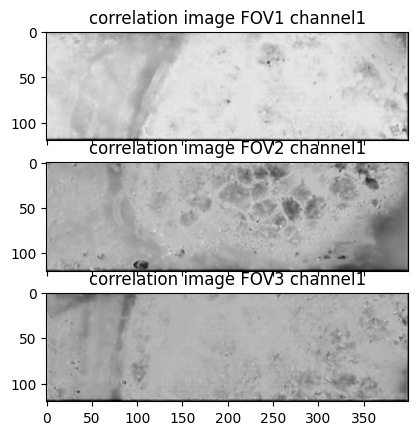

In [188]:
fig, axs = plt.subplots(nrows=len(correlation_images_names), ncols=1, sharex=True, sharey=True)
for ci_index,ci_name in enumerate(correlation_images_names):    
    correlation_image = nwbfile.processing["ophys"]["correlation_images"].images[ci_name]
    axs[ci_index].imshow(correlation_image.data[:].T, cmap="binary")
    axs[ci_index].set_title(ci_name.replace("_"," "))
fig.show()

#### Plot Average Images

In [189]:
average_images_names = list(nwbfile.processing["ophys"]["average_images"].images.keys())
_ = [print(name) for name in average_images_names]

average_image_FOV1_channel1
average_image_FOV2_channel1
average_image_FOV3_channel1


C:\Users\algab\AppData\Local\Temp\ipykernel_24956\80944268.py:6: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



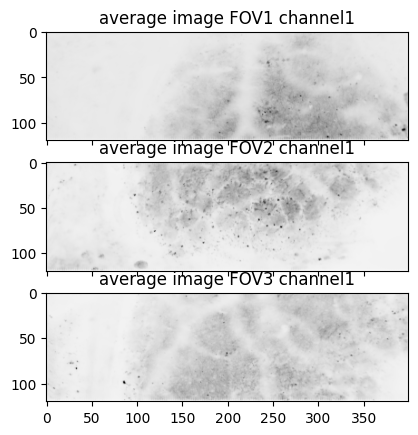

In [190]:
fig, axs = plt.subplots(nrows=len(average_images_names), ncols=1, sharex=True, sharey=True)
for ai_index,ai_name in enumerate(average_images_names):    
    average_image = nwbfile.processing["ophys"]["average_images"].images[ai_name]
    axs[ai_index].imshow(average_image.data[:].T, cmap="binary")
    axs[ai_index].set_title(ai_name.replace("_"," "))
fig.show()

#### Plot Image Segmentation

In [191]:
plane_segmentation_names = list(nwbfile.processing["ophys"]["image_segmentation"].plane_segmentations.keys())
_ = [print(name) for name in nwbfile.processing["ophys"]["image_segmentation"].plane_segmentations.keys()]

plane_segmentation_FOV1_channel1
plane_segmentation_FOV2_channel1
plane_segmentation_FOV3_channel1


C:\Users\algab\AppData\Local\Temp\ipykernel_24956\1174907670.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



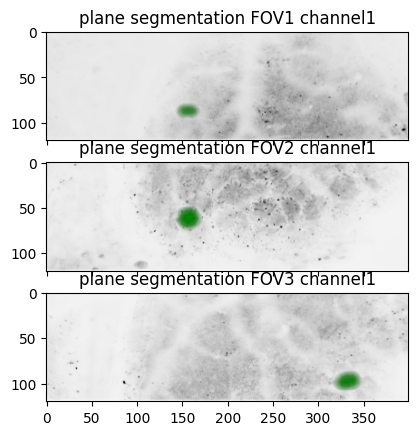

In [214]:
ROI_index = 0

fig, axs = plt.subplots(nrows=len(plane_segmentation_names), ncols=1, sharex=True, sharey=True)
for ps_index,ps_name in enumerate(plane_segmentation_names):    
    average_image = nwbfile.processing["ophys"]["average_images"].images[average_images_names[ps_index]]
    axs[ps_index].imshow(average_image.data[:].T, cmap="binary")
    plane_segmentation = nwbfile.processing["ophys"]["image_segmentation"].plane_segmentations[ps_name]
    x_coordinates = [pix[0] for pix in plane_segmentation[ROI_index].pixel_mask[0]]
    y_coordinates = [pix[1] for pix in plane_segmentation[ROI_index].pixel_mask[0]]
    axs[ps_index].scatter(x_coordinates, y_coordinates, color="green")
    axs[ps_index].set_title(ps_name.replace("_"," "))
fig.show()

## Visualize fluorescence traces
The fluroscence traces are stored in a [Fluorescence](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.Fluorescence) container, the raw traces can be accessed as `nwbfile.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]`.

In [193]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

fluorescence_traces_names = [name for name in nwbfile.processing["ophys"]["fluorescence"].roi_response_series.keys()]

fluorescence_traces_name = fluorescence_traces_names[0]
fluorescence_traces = nwbfile.processing["ophys"]["fluorescence"][fluorescence_traces_name].data[:1000, :10]
df = pd.DataFrame(fluorescence_traces)
df["time"] = nwbfile.processing["ophys"]["fluorescence"][fluorescence_traces_name].timestamps[:1000]
df.set_index("time", inplace=True)
df.columns.name = 'ROIs'

import plotly.express as px

fig = px.line(df, facet_row="ROIs", facet_row_spacing=0.01)

# hide and lock down axes
fig.update_xaxes(visible=True, fixedrange=False)
fig.update_yaxes(visible=False, fixedrange=False)

# remove facet/subplot labels
fig.update_layout(annotations=[], overwrite=True)

# strip down the rest of the plot
fig.update_layout(
    showlegend=True,
    plot_bgcolor="white",
    margin=dict(t=10, l=10, b=10, r=10)
)

fig.show(config=dict(displayModeBar=True))

# Access Odor stimuli <a name="access-odor"></a>

This section demonstrates how to access the odor stimulation data and metadata.


In [194]:
nwbfile.trials

,start_time,stop_time,odorant,concentration,solution_date
id,,,,,
0,59.2888,60.2928,Methyl Salicylate,0.1,2022-05-17
1,60.2966,61.2995,Methyl Salicylate,0.1,2022-05-17
2,61.3034,62.3067,Methyl Salicylate,0.1,2022-05-17
3,62.3106,63.3130,Methyl Salicylate,0.1,2022-05-17


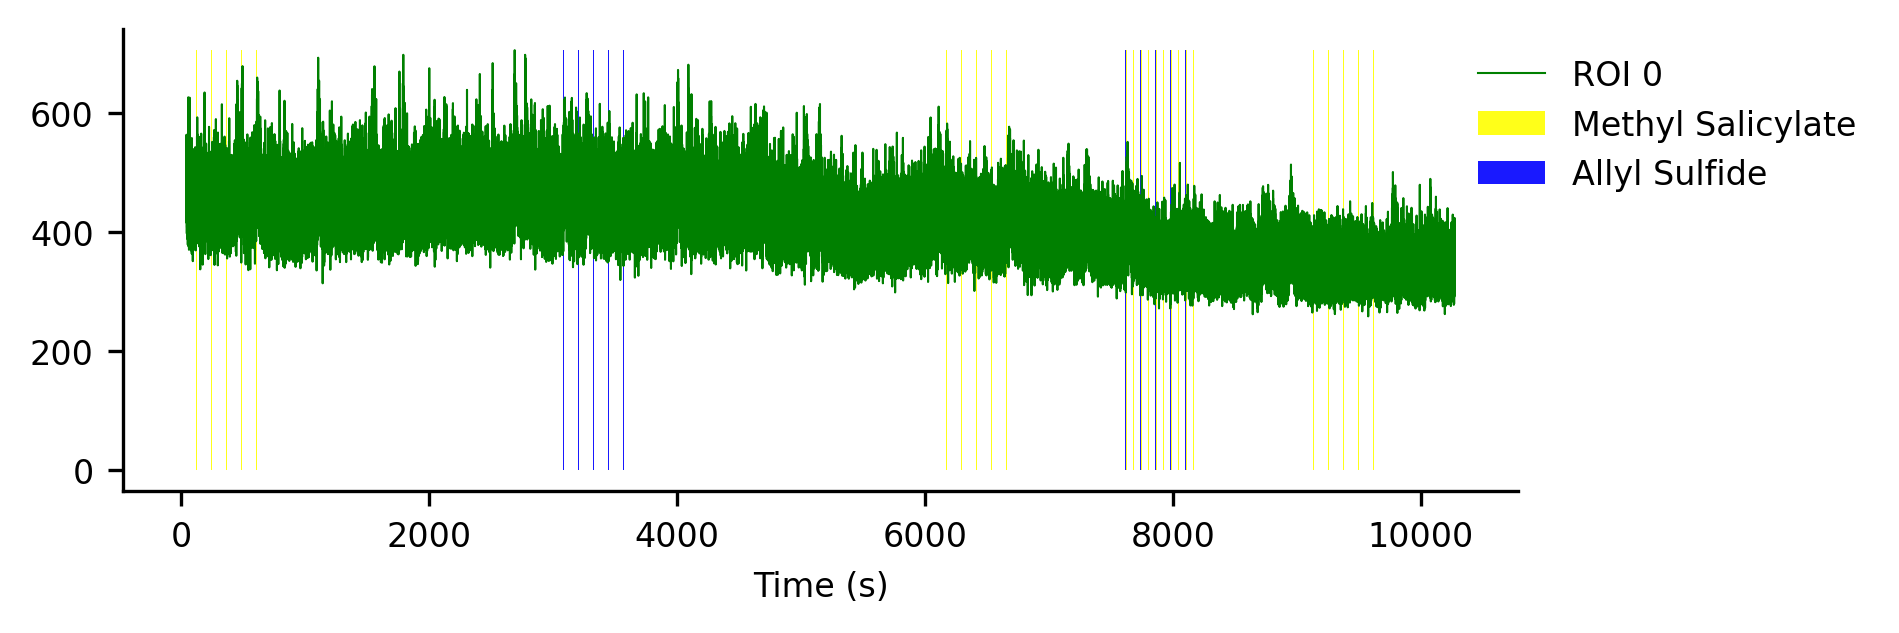

In [210]:
# Prepare data for plotting
ROI_index=0
start=0
stop=-1
fluorescence_data = nwbfile.processing["ophys"]["fluorescence"][fluorescence_traces_name].data[start:stop, ROI_index]
fluorescence_timestamps = nwbfile.processing["ophys"]["fluorescence"][fluorescence_traces_name].timestamps[start:stop]

fig, ax = plt.subplots(figsize=(6, 2), dpi=300)
line_handle, = ax.plot(fluorescence_timestamps, fluorescence_data, color="green", linewidth=0.5, label="ROI {ROI_index}".format(ROI_index=ROI_index))

stimulus_table = nwbfile.trials.to_dataframe()
methyl_salicylate_stim = "Methyl Salicylate"
methyl_salicylate_stim_table = stimulus_table[stimulus_table["odorant"]==methyl_salicylate_stim]
methyl_salicylate_stim_handles = []
for (stimulus_start, stimulus_stop) in zip(methyl_salicylate_stim_table["start_time"], methyl_salicylate_stim_table["stop_time"]):
    methyl_salicylate_stim_handle = ax.fill_between(fluorescence_timestamps, np.nanmax(fluorescence_data), where=(fluorescence_timestamps >= stimulus_start) & (fluorescence_timestamps <= stimulus_stop),
                                    color='yellow', edgecolor='none', alpha=0.9, label=methyl_salicylate_stim)
    methyl_salicylate_stim_handles.append(methyl_salicylate_stim_handle)

allyl_sulfide_stim = "Allyl Sulfide"
allyl_sulfide_stim_table = stimulus_table[stimulus_table["odorant"]==allyl_sulfide_stim]
allyl_sulfide_stim_handles = []
for (stimulus_start, stimulus_stop) in zip(allyl_sulfide_stim_table["start_time"], allyl_sulfide_stim_table["stop_time"]):
    allyl_sulfide_stim_handle = ax.fill_between(fluorescence_timestamps, np.nanmax(fluorescence_data), where=(fluorescence_timestamps >= stimulus_start) & (fluorescence_timestamps <= stimulus_stop),
                                    color='blue', edgecolor='none', alpha=0.9, label=allyl_sulfide_stim)
    allyl_sulfide_stim_handles.append(allyl_sulfide_stim_handle)

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create the legend with the appropriate handles
handles = [line_handle, methyl_salicylate_stim_handles[0], allyl_sulfide_stim_handles[0]]
labels = ["ROI {ROI_index}".format(ROI_index=ROI_index), methyl_salicylate_stim, allyl_sulfide_stim]
ax.legend(handles, labels, frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})

ax.tick_params(axis='y', labelsize=8)
plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()

# Access Treadmill Traces <a name="access-treadmill"></a>

This section demonstrates how to access the treadmill data.

In [202]:
nwbfile.acquisition["treadmill_position"]

treadmill_position pynwb.behavior.SpatialSeries at 0x2130496802448
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1044900,), type "<f8">
  description: treadmill position from Treadmill table
  interval: 1
  offset: 0.0
  reference_frame: unknown
  resolution: -1.0
  timestamp_link: (
    treadmill_velocity <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (1044900,), type "<f8">
  timestamps_unit: seconds
  unit: meters

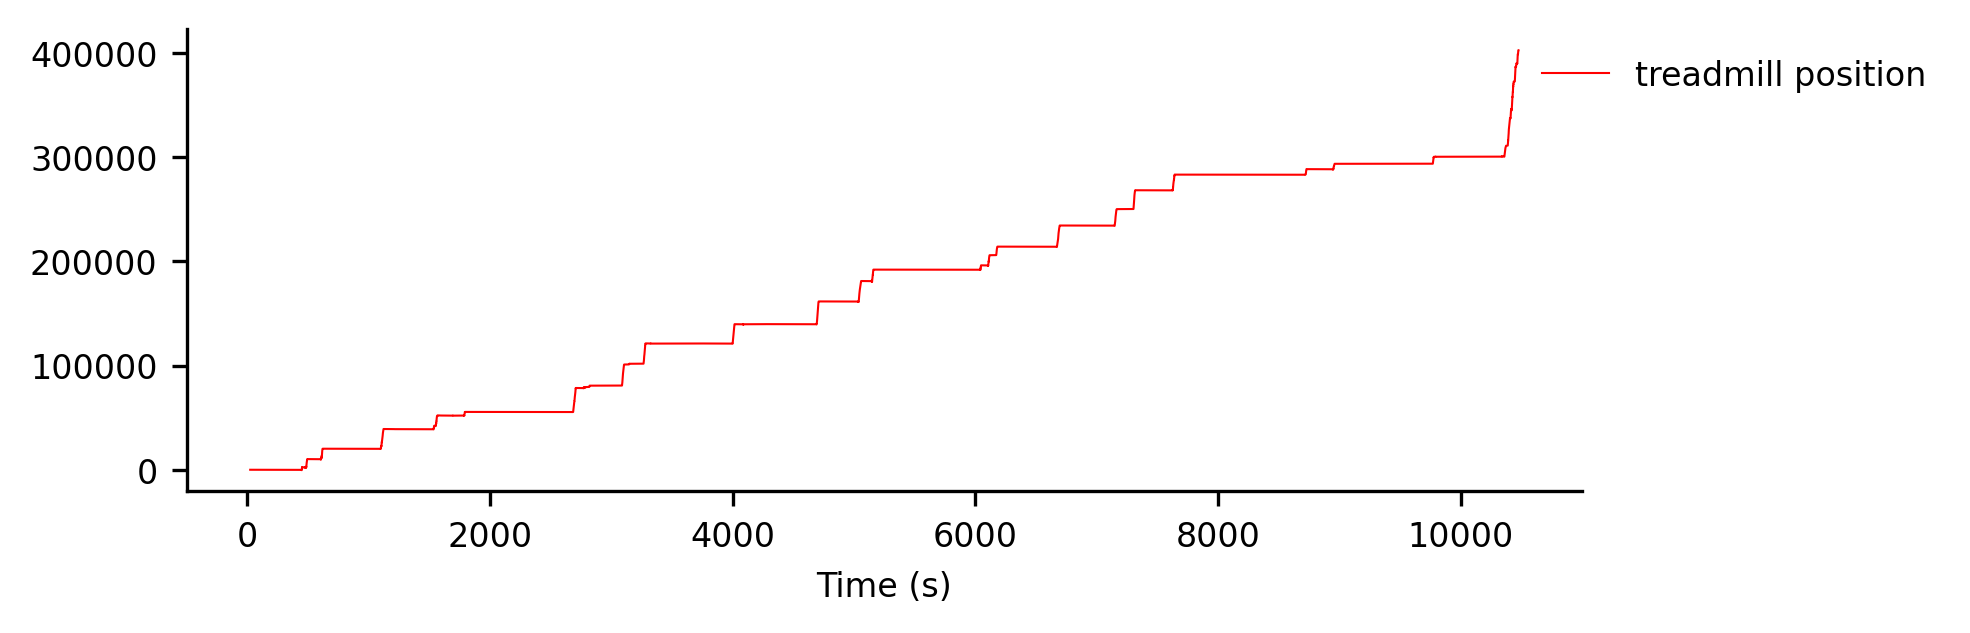

In [209]:
start=0
stop=-1
treadmill_data = nwbfile.acquisition["treadmill_position"].data[start:stop]
treadmill_timestamps = nwbfile.acquisition["treadmill_position"].timestamps[start:stop]

fig, ax = plt.subplots(figsize=(6, 2), dpi=300)
ax.plot(treadmill_timestamps, treadmill_data, color="red", linewidth=0.5, label="treadmill position")

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create the 
ax.legend(frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})

ax.tick_params(axis='y', labelsize=8)
plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()

In [198]:
nwbfile.processing["behavior"]["treadmill_velocity"]

treadmill_velocity pynwb.base.TimeSeries at 0x2130507873456
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1044900,), type "<f8">
  description: treadmill velocity from Treadmill table
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: treadmill_position pynwb.behavior.SpatialSeries at 0x2130496802448
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1044900,), type "<f8">
  description: treadmill position from Treadmill table
  interval: 1
  offset: 0.0
  reference_frame: unknown
  resolution: -1.0
  timestamp_link: (
    treadmill_velocity <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (1044900,), type "<f8">
  timestamps_unit: seconds
  unit: meters

  timestamps_unit: seconds
  unit: unknown

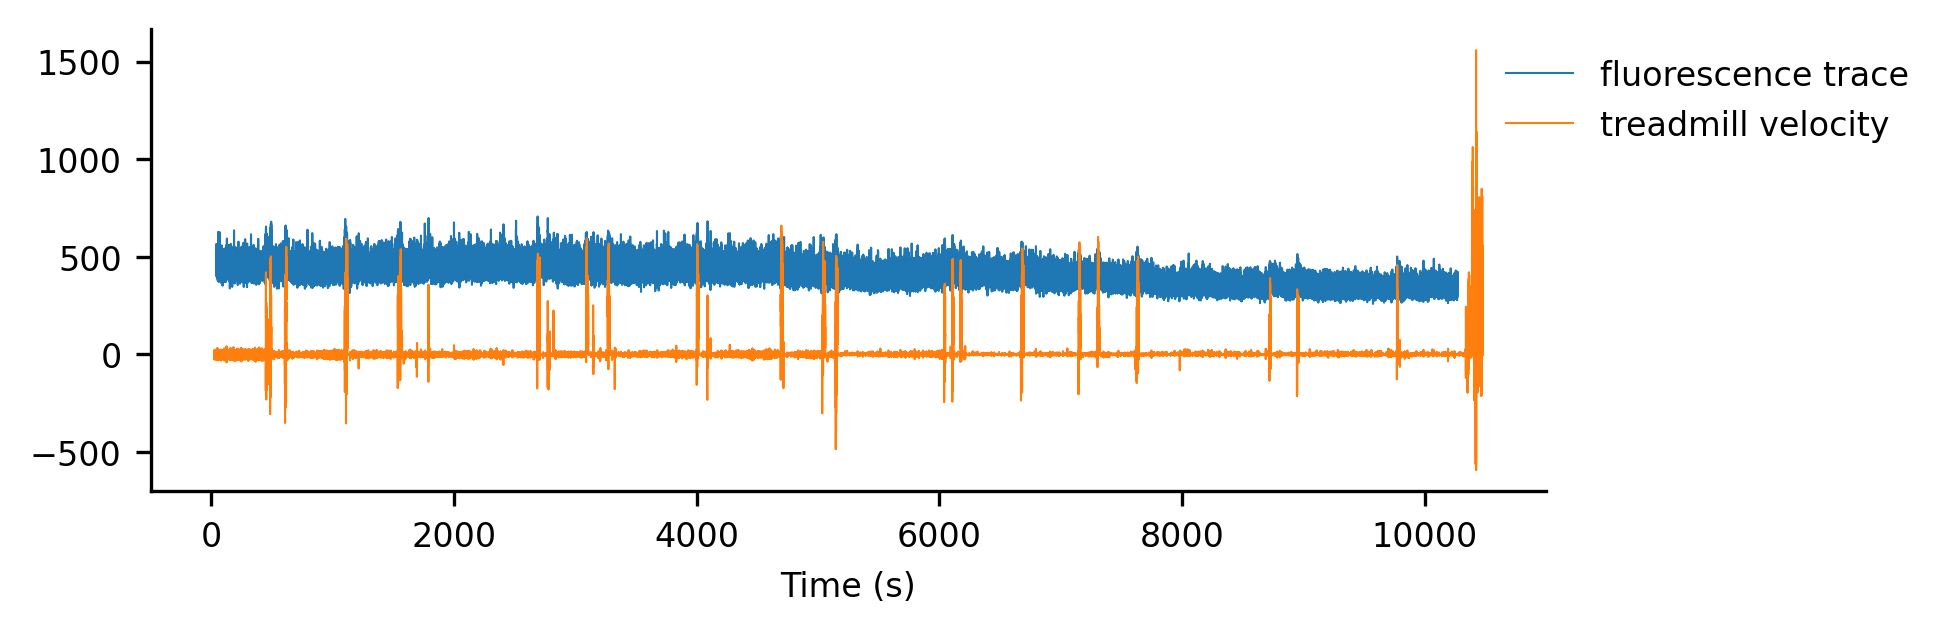

In [208]:
data = nwbfile.processing["behavior"]["treadmill_velocity"].data[start:stop]
treadmill_timestamps = nwbfile.acquisition["treadmill_position"].timestamps[start:stop]

fig, ax = plt.subplots(figsize=(6, 2), dpi=300)
ax.plot(fluorescence_timestamps, fluorescence_data, linewidth=0.5, label="fluorescence trace")
ax.plot(treadmill_timestamps, data*25, linewidth=0.5, label="treadmill velocity")

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create the 
ax.legend(frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})

ax.tick_params(axis='y', labelsize=8)
plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()